In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from aggmap import AggMap


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() #load data

In [3]:
_, w, h = x_train.shape
orignal_cols = ['p-%s' % str((i+1)).zfill(len(str(w*h))) for i in range(w*h)]
x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], w*h), columns=orignal_cols)
x_test_df = pd.DataFrame(x_test.reshape(x_test.shape[0], w*h), columns=orignal_cols)

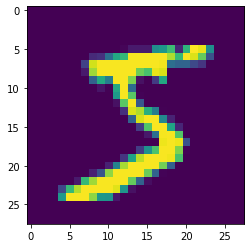

In [4]:
ax = plt.imshow(x_train_df.iloc[0].values.reshape(w,h))

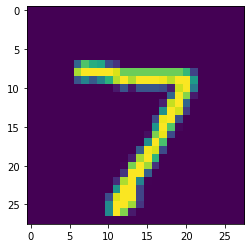

In [5]:
ax = plt.imshow(x_test_df.iloc[0].values.reshape(w,h))

## Step1: MNIST pixel random permutation

In [6]:
shuffled_cols = shuffle(orignal_cols, random_state=111)
x_train_df_shuffled = x_train_df[shuffled_cols]
x_test_df_shuffled = x_test_df[shuffled_cols]

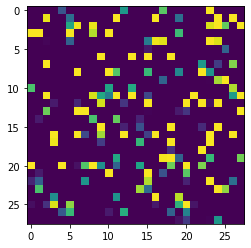

In [7]:
ax = plt.imshow(x_train_df_shuffled.iloc[0].values.reshape(w,h))

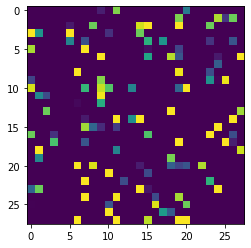

In [8]:
ax = plt.imshow(x_test_df_shuffled.iloc[0].values.reshape(w,h))

## Step2: AggMap pre-fitting on training set

In [9]:
mp = AggMap(x_train_df_shuffled, metric='correlation')
mp = mp.fit(cluster_channels=1, var_thr=0, verbose=0)

2021-10-04 02:32:45,967 - INFO - [bidd-aggmap] - Calculating distance ...
2021-10-04 02:32:46,004 - INFO - [bidd-aggmap] - the number of process is 16


100%|################################################################################| 784/784 [00:02<00:00, 362.02it/s]


2021-10-04 02:33:42,732 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2021-10-04 02:33:46,554 - INFO - [bidd-aggmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-10-04 02:33:47,175 - INFO - [bidd-aggmap] - Finished


## Step3: AggMap transformation on training and test test

In [10]:
x_train_restructured = mp.batch_transform(x_train_df_shuffled.values)
x_test_restructured = mp.batch_transform(x_test_df_shuffled.values)

100%|###########################################################################| 10000/10000 [00:04<00:00, 2351.53it/s]


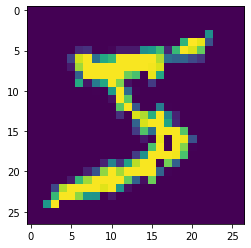

In [11]:
ax = plt.imshow(x_train_restructured[0].reshape(*mp.fmap_shape))

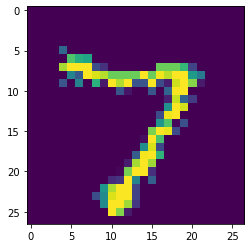

In [12]:
ax = plt.imshow(x_test_restructured[0].reshape(*mp.fmap_shape))